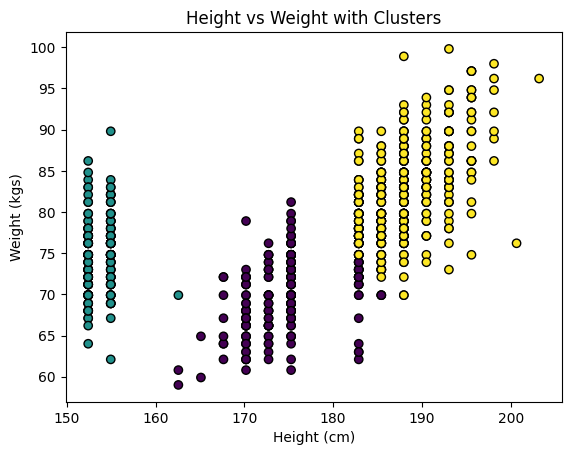

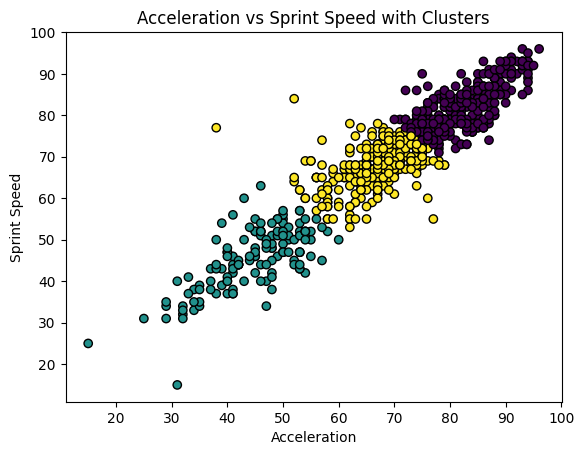

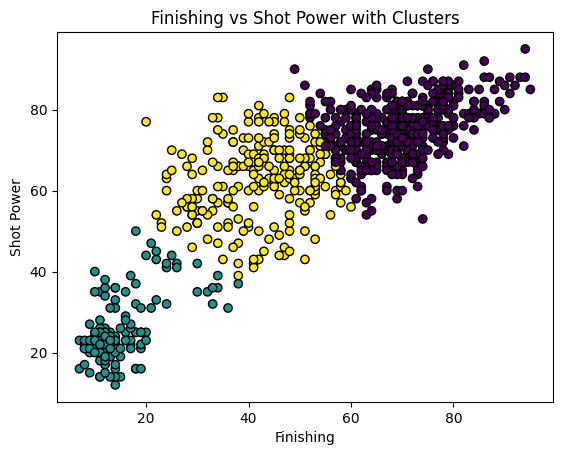

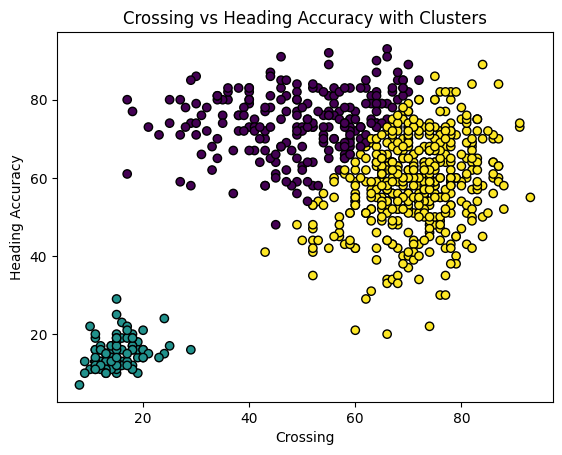

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans

# Загрузка датасета
df = pd.read_csv('C:/Users/user/Downloads/archive/fifa_players.csv')

# Добавляем новый атрибут 'current age'
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['current_age'] = df['birth_date'].apply(lambda x: (datetime.now() - x).days // 365)
df.to_csv("C:/Users/user/Downloads/archive/updated_fifa_players.csv", index=False)

# 'Причесывание' датасета
df = df.drop_duplicates()
df = df.dropna()

# Выбор признаков для кластеризации
features = df[['height_cm', 'weight_kgs']]
features_acceleration_sprint = df[['acceleration', 'sprint_speed']]
features_finishing_shot = df[['finishing', 'shot_power']]
features_crossing_heading = df[['crossing', 'heading_accuracy']]

# Создание моделей KMeans для каждого случая
kmeans_height_weight = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_acceleration_sprint = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_finishing_shot = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_crossing_heading = KMeans(n_clusters=3, n_init=10, random_state=42)

# Кластеризация
df['cluster_label_height_weight'] = kmeans_height_weight.fit_predict(features)
df['cluster_label_acceleration_sprint'] = kmeans_acceleration_sprint.fit_predict(features_acceleration_sprint)
df['cluster_label_finishing_shot'] = kmeans_finishing_shot.fit_predict(features_finishing_shot)
df['cluster_label_crossing_heading'] = kmeans_crossing_heading.fit_predict(features_crossing_heading)

# Визуализация кластеров
plt.scatter(df['height_cm'], df['weight_kgs'], c=df['cluster_label_height_weight'], cmap='viridis', edgecolor='k')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kgs)')
plt.title('Height vs Weight with Clusters')
plt.show()

plt.scatter(df['acceleration'], df['sprint_speed'], c=df['cluster_label_acceleration_sprint'], cmap='viridis', edgecolor='k')
plt.xlabel('Acceleration')
plt.ylabel('Sprint Speed')
plt.title('Acceleration vs Sprint Speed with Clusters')
plt.show()

plt.scatter(df['finishing'], df['shot_power'], c=df['cluster_label_finishing_shot'], cmap='viridis', edgecolor='k')
plt.xlabel('Finishing')
plt.ylabel('Shot Power')
plt.title('Finishing vs Shot Power with Clusters')
plt.show()

plt.scatter(df['crossing'], df['heading_accuracy'], c=df['cluster_label_crossing_heading'], cmap='viridis', edgecolor='k')
plt.xlabel('Crossing')
plt.ylabel('Heading Accuracy')
plt.title('Crossing vs Heading Accuracy with Clusters')
plt.show()

# Сохранение изменений
df.to_csv("C:/Users/user/Downloads/archive/clustered_fifa_players.csv", index=False)

#Выводы: В данной работе к загруженному датасету 'fifa_players.csv'был добавлен новый атрибут 'current age', который показывает текущий возраст игроков, было выполнено 'причесывание датасета'
#Также ознакомился с методом KMeans, сделал кластеризацию и построил графики зависимостей различных атрибутов. Для каждого было выделено три ярковыраженных кластера
